# Exercise 2.3

*The exercises in this IPython notebook are based on the exercises of Chapter 14 of [Easly and Kleinberg (2010)][1].*

Let's recreate the graph of Figure 14.15 from the book, and display its image:

[1]: http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch14.pdf "Chapter 14, The Structure of the Web"


In [1]:
import networkx as nx
import IPython

G1 = nx.DiGraph()
G1.add_edge('A', 'C')
G1.add_edge('B', 'C')
G1.add_edge('B', 'D')
G1.add_edge('B', 'E')

viz = nx.to_agraph(G1)
viz.layout(prog='dot')
viz.draw('figure14-15.png')

IPython.display.Image('figure14-15.png')

AttributeError: 'module' object has no attribute 'to_agraph'

## Exercise 2.3.1,  the Authority Update Rule

Implement the function `authority_update(Graph, node_values)` that returns the values that you get if you run the Authority Update Rule on the network `Graph`, see Page 356 of Easly & Kleinberg. The values should be returned in a Python dictionary with nodes as key and values the sum of the hub scores of all pages that point to the node.

*Tip: The suggested solution below contains a third parameter `normalized` that has a default value (`False`). This third parameter is not mandatory when calling the function. You can ignore the third parameter for now. We will use it in Exercise 2.3.4.*

In [26]:
# Produces a dictionary with nodes as key and values 1
# Can also be done with list comprehension as: start_values = { node : 1 for node in G1 }
start_values_G1 = {}
for node in G1:  
    start_values_G1[node] = 1

# This function should implement the authority update rule.
def authority_update (Graph, node_values, normalized=False):
    authority_values = {}
    # begin of solution
    for node in Graph:
        authority_values[node] = 0
    for node in Graph:
        for neighbour in Graph[node]:
            authority_values[neighbour] += node_values[node]
    #end of solution
    return authority_values
    
authorities = authority_update(G1, start_values_G1)

authorities  # show the result

{'A': 0, 'B': 0, 'C': 2, 'D': 1, 'E': 1}

## Exercise 2.3.2, the Hub Update Rule

Implement the function `hub_update(Graph, node_values)` that returns the values that you get if you run the Hub Update Rule on the network `Graph`.

In [27]:
# This function should implement the authority update rule.
def hub_update (Graph, node_values, normalized=False):
    hub_values = {}
    # begin of solution
    for node in Graph:
        hub_values[node] = 0
    for node in Graph:
        for neighbour in Graph[node]:
            hub_values[node] += node_values[neighbour]
    #end of solution
    return hub_values
    
hubs = hub_update(G1, authorities)

hubs # show the result

{'A': 2, 'B': 4, 'C': 0, 'D': 0, 'E': 0}

## Exercise 2.3.3, Hub Authority updates

Implement the function `hub_authority_updates(Graph, node_values, k, normalized=False)` that performs a sequence of `k` hub-authority updates, as explained on Page 357 of Easly & Kleinberg. The function should return the hub values of each node, and also the authority values of each node.

*Tip: Note that Kleinberg maybe should have called the algorithm: "Authority Hub Updates"...* 

In [28]:
def hub_authority_updates(Graph, node_values, k, normalized=False):
    authority_values = {}
    hub_values = {}
    # begin of solution
    for i in range(k):
        authority_values = authority_update(Graph, node_values, normalized)
        hub_values = hub_update(Graph, authority_values, normalized)
        node_values = hub_values
    # end of solution
    return hub_values, authority_values

hub_authority_updates(G1, start_values_G1, k=1)

({'A': 2, 'B': 4, 'C': 0, 'D': 0, 'E': 0},
 {'A': 0, 'B': 0, 'C': 2, 'D': 1, 'E': 1})

## Exercise 2.3.4, Normalization
Go back to your solutions of Exercises 2.3.1, 2.3.2, and 2.3.3, and implement normalization by adding the following to your implementation:

    if (normalized):
        # 
        # Add your solution here
        # 
        
*Tip: Make sure that `hub_authority_updates()` passed the value of `normalized` on to the update functions.*

## Another graph
Let's have a look at the graph of Figure 14.16 of the book.

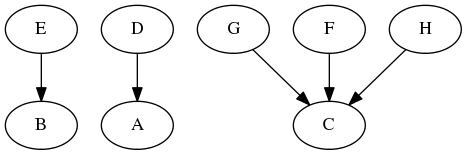

In [29]:
G2 = nx.DiGraph()
G2.add_edge('D', 'A')
G2.add_edge('E', 'B')
G2.add_edge('F', 'C')
G2.add_edge('G', 'C')
G2.add_edge('H', 'C')

viz = nx.to_agraph(G2)
viz.layout(prog='dot')
viz.draw('figure14-16.png')

IPython.display.Image('figure14-16.png')

## Exercise 2.3.5, again
Run `hub_authority_updates()` on graph `G2`, for `k=2` with and without normalization.

*Tip: See Exercise 2a on Page 378 of Easly & Kleinberg.*

In [30]:
start_values_G2 = { node : 1 for node in G2 }

# begin of solution
hub_authority_updates(G2, start_values_G2, k=2, normalized=False)
# end of solution

({'A': 0, 'B': 0, 'C': 0, 'D': 1, 'E': 1, 'F': 9, 'G': 9, 'H': 9},
 {'A': 1, 'B': 1, 'C': 9, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0})

## Exercise 2.3.6, add an edge
What happens to the scores when node 'E', which links to 'B', decides to link to 'C' as well? Which of the nodes 'A' or 'B' now has the higher authority score? Give a brief explanation in which you provide some inuition for why the difference in authority scores between 'A' and 'B' turned out the way it did.

*Tip: See Exercise 2b and 2c on Page 379 of Easly & Kleinberg.*

In [31]:
G3 = G2.copy()
G3.add_edge('E', 'C')

# begin of solution
start_values_G3 = { node : 1 for node in G3 }
hub_authority_updates(G3, start_values_G3, k=2, normalized=False)
# end of solution

({'A': 0, 'B': 0, 'C': 0, 'D': 1, 'E': 22, 'F': 17, 'G': 17, 'H': 17},
 {'A': 1, 'B': 5, 'C': 17, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0})

## Exercise 2.3.7, bonus

Use your implementation of the Hub-Authority Algorithm to check your solutions for Exercise 3 on Pages 379 and 380, and Exercise 6 on Page 382 of Easly & Kleinberg.



## Exercise 2.3.8, with NetworkX

Search the [NetworkX Reference Documentation][1] for the hub-authority algorithm. Show the values for hubs and authorities that you get by running the *k*-step hub-authority algorithm provided by NetworkX, when we choose the number of steps *k* to be 2. Run the NetworkX algorithm on `G1`, `G2`, and `G3`, with and without normalization.

Do both implementations give the same results? Which implementation is closer to the implementation presented by Easly & Kleinberg?

[1]: networkx.github.io/documentation/latest/reference/ "NetworkX Reference Documentation"

In [32]:
# begin of solution
nx.hits(G1, 2, tol=10, nstart = start_values_G1, normalized=False)
# end of solution

({'A': 0.5, 'B': 1.0, 'C': 0.0, 'D': 0.0, 'E': 0.0},
 {'A': 0.0, 'B': 0.0, 'C': 1.0, 'D': 0.5, 'E': 0.5})

## PageRank

Consider the graph from Figure 14.19 from Easly & Kleinberg:

In [1]:
G4 = nx.DiGraph()
G4.add_edge('A', 'B')
G4.add_edge('A', 'C')
G4.add_edge('C', 'A')
G4.add_edge('B', 'A')

viz = nx.to_agraph(G4)
viz.layout(prog='dot')
viz.draw('figure14-19.png')

IPython.display.Image('figure14-19.png')

NameError: name 'nx' is not defined

## Exercise 2.3.9, NetworkX PageRank

From the NetworkX Documentation (See: [Link Analysis][1]), use the PageRank algorithm to check if the assignment of the numbers to the nodes in Figure 14.19 of Easly & Kleinberg on Page 381 form an equilibrium set of the PageRank values for this network of web pages. Explain your answer.

[1]: http://networkx.github.io/documentation/latest/reference/algorithms.link_analysis.html "NetworkX Link Analysis Algorithms"

In [34]:
# begin of solution
nx.pagerank(G4, alpha=1.0)
# end of solution

{'A': 0.2999990609700136,
 'B': 0.10000047413148146,
 'C': 0.20000053875126156,
 'D': 0.10000047413148146,
 'E': 0.29999945201576084}

## Exercise 2.3.10, Bonus 1

Also check your answers for the graphs in Figures 14.20 and 14.21 of Easly & Kleinberg. 

In [ ]:
# begin of solution
nx.pagerank(G4, alpha=1.0)
# end of solution

## Exercise 2.3.11, Bonus 2: Implement your own PageRank

Implement your own version of PageRank.

*Tip: Take inspiration from the function `authority_update()` above.*

In [35]:
# begin of solution
#  to be provided
# end of solution

## Project: The UTwente web graph

Download the UTwente web graph from Blackboard, and get the 100 pages with the highest PageRank.
Write a normal Python program (so no IPython notebook).

This is a very big graph that might be too big for your system to handle. 
There are two versions of the graph on Blackboard: `utwente201509.dot` and `utwente201509small.dot`: The latter does not contain the URLs, making it somewhat easier to handle for NetworkX.